# Анализ клиентов фитнес-центров «Культурист-датасаентист»

## Введение

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Цель исследования**

Провести анализ и подготовить план действий по удержанию клиентов.

**Задачи исследования**
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.

## Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

Данные об оттоке в текущем месяце:
* 'Churn' — факт оттока в текущем месяце.

## Исследовательский анализ данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

### Общее изучение данных

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Для удобства, сразу приведем все названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Пропусков нет, это отлично! Все признаки числовые (или приведены к числовым), временной структуры нет.

По средним значениям сразу можем заметить некоторые тенденции:
* равномерное гендерное распределение
* большинство людей ходит или работает в районе, где находится клуб
* около половины посетителей полвучают корпоративные скидки
* в среднем берут абонементы на 4-5 месяцев
* средний возраст около 30 лет

### Cредние значения признаков в двух группах

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался


In [7]:
data.groupby(by='churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Можно заметить, что те, кто ушел в отток:
* в среднем реже имеют скидки (корпоративные или от друзей)
* берут абонементы на меньшее время
* около месяца назад пришли первый раз (lifetime)
* ходят один раз в неделю в среднем (те кто остался в среднем два раза в неделю)
* реже ходят на групповые занятия

###  Cтолбчатые гистограммы и распределения признаков 
Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался 

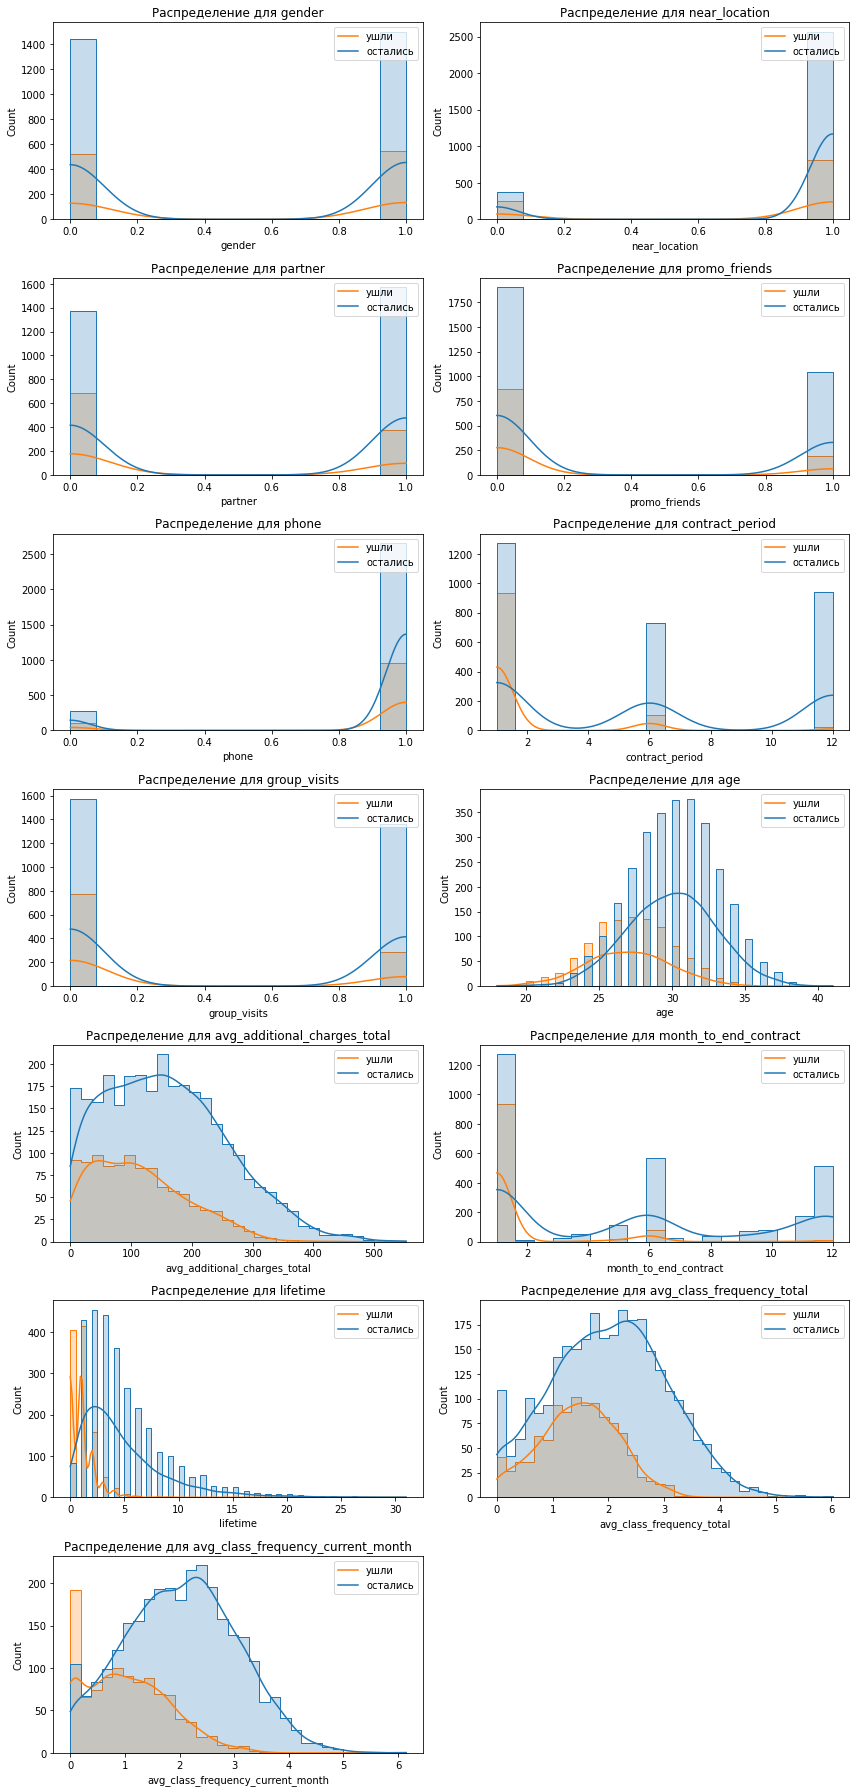

In [8]:
fig, axes = plt.subplots(7, 2, figsize=(12,25))
axes[-1, -1].axis('off')

for column, ax in zip(data.columns, axes.flatten()):
    if column != 'churn':
        sns.histplot(data=data, x=column, hue='churn', element='step', kde=True, ax=ax)
        ax.title.set_text('Распределение для '+ str(column))
        ax.legend(labels=['ушли', 'остались'])
fig.tight_layout()

В целом распределения достаточно похожи, но есть пара выделяющихся (но достаточно логичных) моментов:

* распределение для contract_period (длительность абонемента) - те, кто ушел, в основном брали абонемент на один месяц, немногие на полгода и почти никто на год. Среди тех, кто продолжает ходить распределение достаточно равномерное

* распределение для month_to_end_contract (время до конца действия абонемнта) - среди тех кто ушел, почти всем осатлся один месяц и маленькому кол-ву  полгода. Это логично вытекает из предыдущего наблюдения

* распределение для age (возрасту) - для тех, кто ушел, нормальное распределение смещено в стороны более молодых (пик на 27 годых). Среди тех, кто продолжает ходить пик приходится на 31 год. Можно предположить, что ближе к 30 люди больше заботятся о своем здоровье и регулярных физ.нагрузках

* распределение для avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц) - большой пик на нуле среди тех, кто ушел. Видимо люди покупали абонемент на месяц, ни разу не приходили и дальше не возвращались

### Матрица корреляций

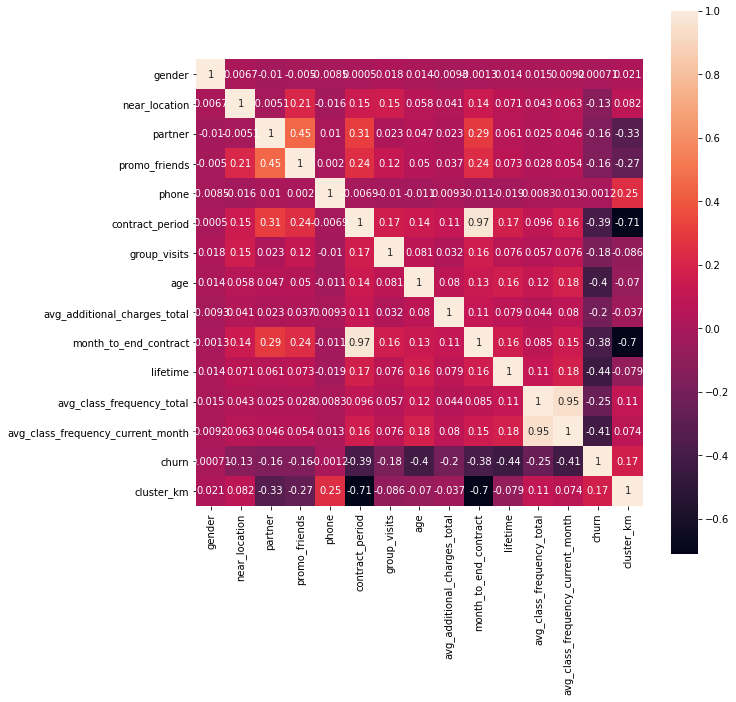

In [31]:
cm = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True)
plt.show()

Видим, что сильно скореллированы две пары признаков:
* contract_period и month_to_end_contract
* avg_class_frequency_current_month и avg_class_frequency_total

Это довольно логичный результат. Здравый смысл говорит, что эти параметры действительно должны друг от друга зависеть

## Прогноз оттока клиентов

Разобьем выборку на обучающую и валидационную в соотношении 80\20


In [10]:
X = data.drop(columns=['churn'])
y = data['churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Обучим модель логистической регрессии

In [12]:
m_reg = LogisticRegression(solver='liblinear', random_state=0)
m_reg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
reg_predict = m_reg.predict(X_test)

Обучим модель случайного леса

In [14]:
m_forest = RandomForestClassifier(n_estimators = 100, random_state=0)
m_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
forest_predict = m_forest.predict(X_test)

Посмотрим на результаты

In [16]:
print('Метрики для логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, reg_predict)))
print('Precision: {:.2f}'.format(precision_score(y_test, reg_predict)))
print('Recall: {:.2f}'.format(recall_score(y_test, reg_predict)))
print()
print('Метрики для случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, forest_predict)))
print('Precision: {:.2f}'.format(precision_score(y_test, forest_predict)))
print('Recall: {:.2f}'.format(recall_score(y_test, forest_predict)))

Метрики для логистической регрессии:
Accuracy: 0.93
Precision: 0.86
Recall: 0.83

Метрики для случайного леса:
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


По всем рассматриваемым метриками лучше показала модель логистической регресии

Итого получили обученную модель лог.регрессии, которая умеет предсказывать отток (и вероятность оттока) клиентов

Посмотрим на важность признаков при прогнозировании оттока

In [17]:
importances = m_forest.feature_importances_ 

In [18]:
importances = pd.DataFrame(data=importances, index=X.columns)
importances.columns = ['importance']

In [19]:
importances.sort_values(by='importance', ascending=False)

,importance
lifetime,0.276499
avg_class_frequency_current_month,0.180170
avg_class_frequency_total,0.129883
age,0.119129
avg_additional_charges_total,0.091473
month_to_end_contract,0.068855
contract_period,0.065964
group_visits,0.015652
gender,0.012425
partner,0.012285


Оказалось, что самые важные признаки это:
   * время с момента первого обращения (звучит логично, лояльная аудитория продолжает ходить, а новенькие могут быстро отвалиться)
   * посещаемость тренировок (тоже довольно логично)
   * возраст (соотносится с рапрсделением по возрасту среди тех кто ушел и остался)

## Кластеризация

Для начала нужно стандартизировать данные 

In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Дендрограмма

Построим дендрограмму, чтобы определить оптимальное количество кластеров

In [21]:
linked = linkage(X_sc, method = 'ward')

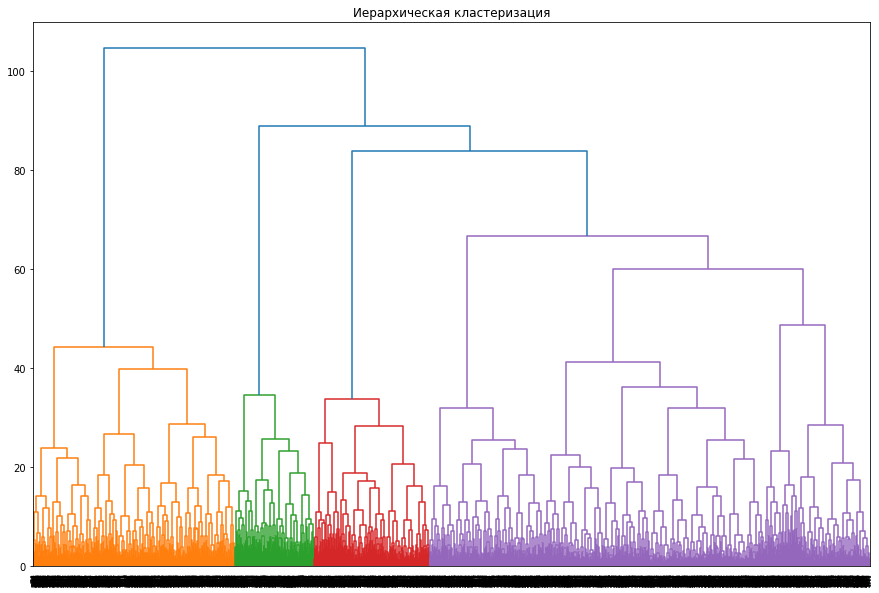

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Договорились, что оптимальное число кластеров - 5 (хотя вообще выглядит как 4...)

### K-means

Теперь можем обучить K-means

In [23]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

In [24]:
data['cluster_km'] = labels

### Анализ кластеров

Посмотрим на средние значения и распределения признаков внутри кластеров

In [25]:
data.groupby(by='cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Сразу можем заметить, что
* есть отдельный кластер людей, который не живут\работают рядом с фитнес-центром
* есть кластер людей с большими скидками (корпоративными и от друзей), который берут большие абонементы (полгода-год)


* есть два очень стабильных кластеры (0 и 4), два кластера склонны к оттоку (2, 3), один промежуточный (1)

Посмотрим сколько людей в каждом кластере

In [26]:
data.groupby(by='cluster_km')['gender'].count()

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

Построим распределение признаков для каждого кластера

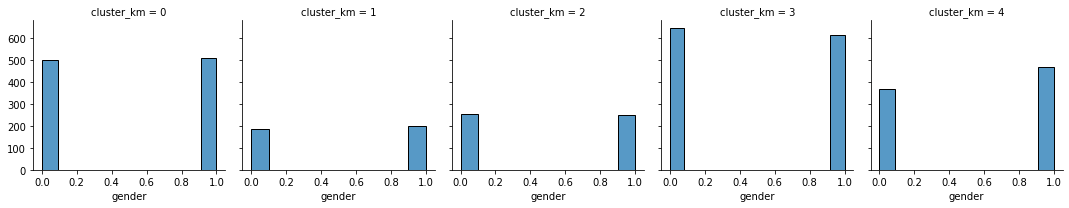

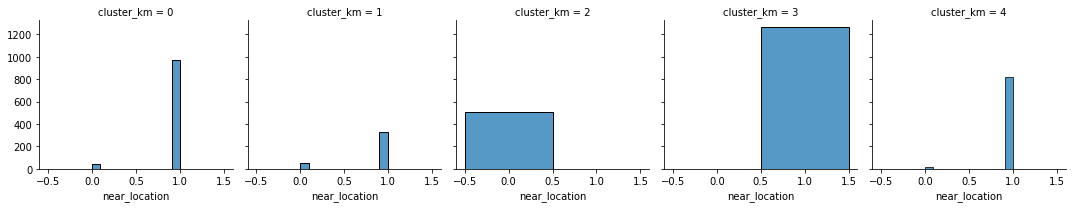

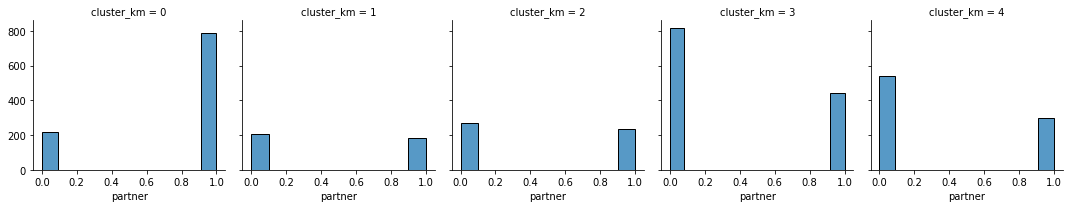

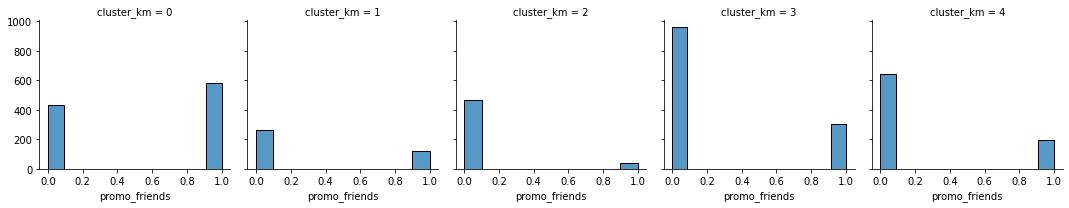

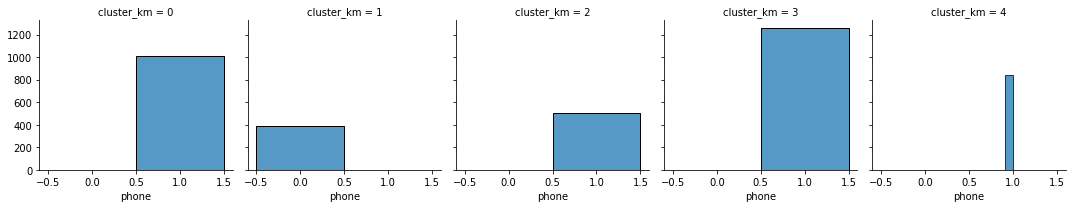

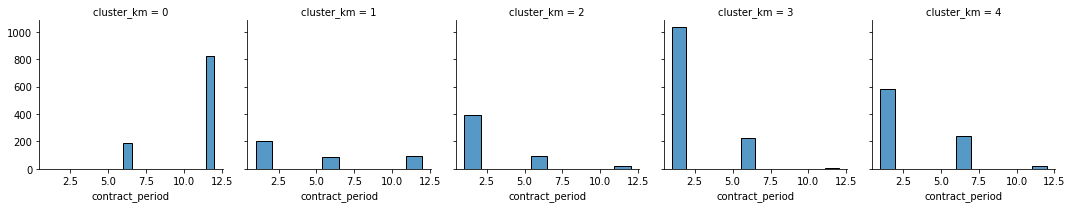

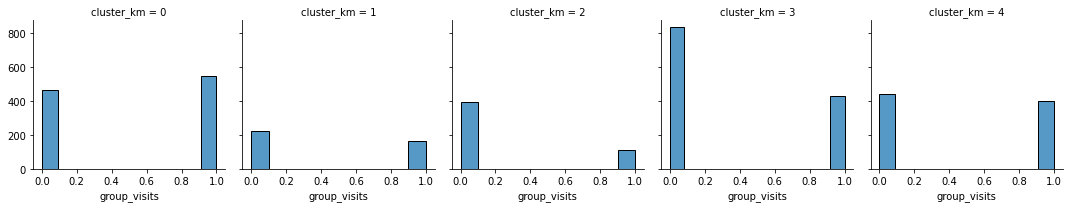

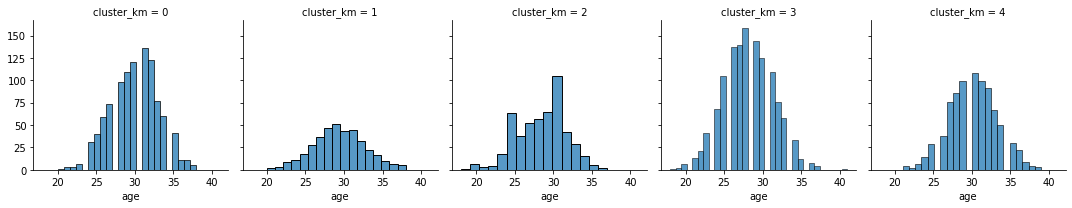

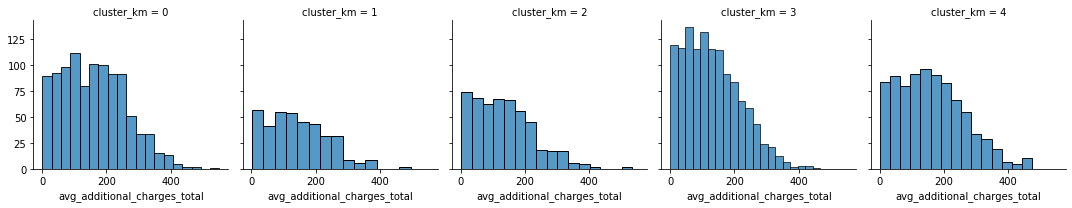

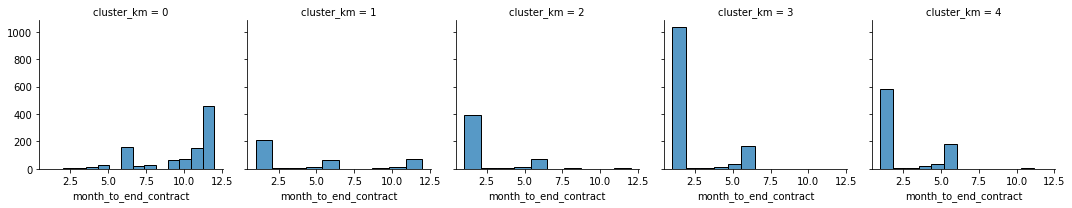

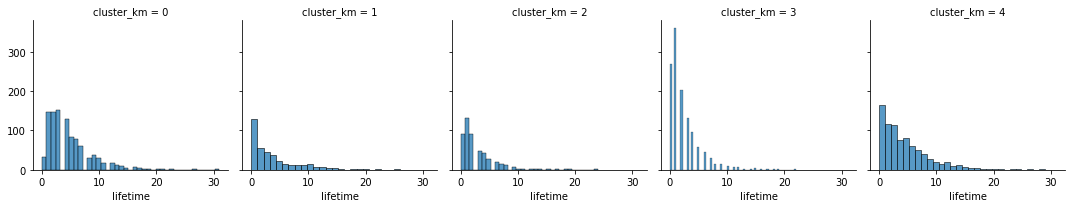

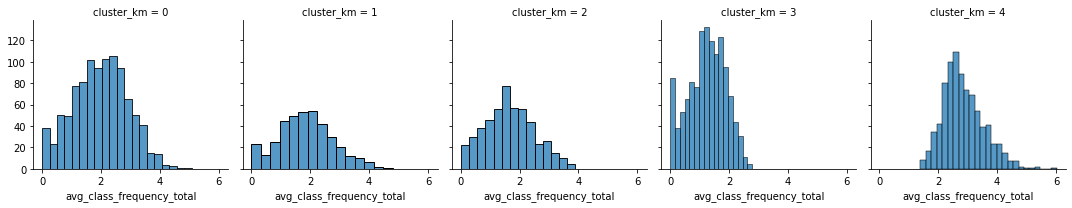

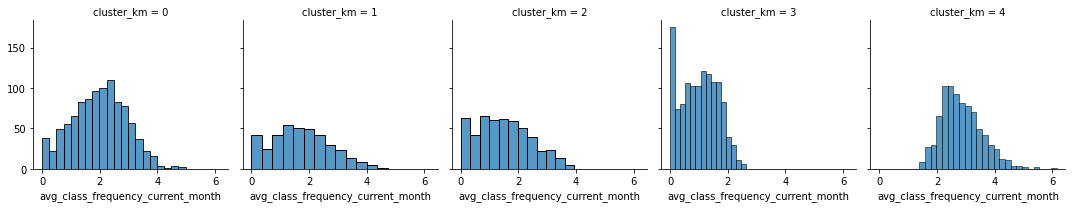

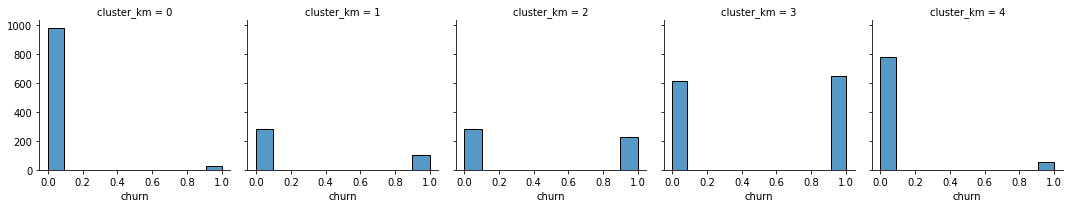

In [27]:
for column in data.columns:
    if column != 'cluster_km':
        g = sns.FacetGrid(data, col="cluster_km")
        g.map(sns.histplot, column)


Выыедем еще раз отдельно долю оттока для каждого кластера

In [28]:
data.groupby(by='cluster_km')['churn'].mean()

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Видно, что есть два очень стабильных кластеры (0 и 4), два кластера склонны к оттоку (2, 3), один промежуточный (1).

Причем если смотреть по абсолютным значениям, то в 3 кластере самое большое число людей, которые ушли.
Поэтому имеет смысл обратить внимание в первую очередь на 3-ий кластер

## Общий вывод

1. Научились прогнозировать вероятность оттока, обучили модель


2. Выяснили самые важные признаки для прогноза оттока:
    * время с момента первого обращения (звучит логично, лояльная аудитория продолжает ходить, а новенькие могут быстро отвалиться)
    * посещаемость тренировок
    * возраст
    
    Интересно, что в кластерах lifetime и возраст распределены достаточно одинаково


3. Сформировали несколько кластеров типичных клиентов:
    * Кластер 0 - *работники* (обладатели корпоративных скидок) - берут большие абонементы (в основном на год), живут рядом, регулярно ходят, самый стабильный кластер
    * Кластер 2 - *живущие далеко* - живут далеко, меньше всего ходят на групповые тренировки, большой процент оттока
    * Кластер 3 - *начну с понедельника* - здесь большое число людей, которые купили абонемент на месяц, но так ни разу и не пришли (пик на нуле в посещяемости). самый большой относительный и абсолютный показатель оттока
    * Кластер 4 - *спортсмены* - регулярно ходят на 2-4 тренировки в неделю, живут рядом, берут абонементы на месяц или полгода, тоже очень стабильный кластер
    * Кластер 1 - все остальные, средние распределения, средние показатели оттока
    

4. Рекомендации по снижению оттока:
    * Большое число людей покупают абонементы, но так ни разу и не приходят (*начну с понедельника*). Возможно имеет смысл предложить бесплатное фитнес-тестирование первый раз, или бесплатное вводное занятие. Плюс периодически напоминать о себе "мол вы купили абонемент, напоминаем какое у нас удобное расписание, классные тренера и вообще" 
    * Оказалось что возраст влияет на отток. Можно попробовать рассылки с полезными материалами о здоровье типа "как важно и полезно в молодом возрасте регулярно тренить"
    * Тем, кто далеко живет и мало ходит на групповые тренировки (кластер 2) можно предложить бесплатную(или скидку на) пробную групповую тренировку. Ведь группа и любимый тренер это отличные мотиваторы регулярных занятий
    